In [1]:

# import library

import os
from shutil import copy
import xml.etree.ElementTree as ET
import xml
from xml.dom import minidom
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = '/data/jeongeun/openimage/Annotations'
imagepath = '/data/jeongeun/openimage/JPEGImages'
xmllspath =  'set.txt' #'../../dataset/tasklist/t2_train.txt'

# datapath = '/data/jeongeun/OWOD_datasets/VOC2007/Annotations'
# imagepath = '/data/jeongeun//OWOD_datasets/VOC2007/JPEGImages'
# xmllspath =  '/data/jeongeun/OWOD_datasets/VOC2007/ImageSets/Main/all_task_test.txt'

In [3]:
with open(xmllspath, newline='') as f:
    data = f.read()


xmlls = data.split("\n")
while '' in xmlls:
    xmlls.remove('')
new_xmlls = []
for xmll in xmlls:
    new_xmlls.append(xmll.split('train/')[1])
xmlls = [data+'.xml' for data in new_xmlls]

# with open(xmllspath, newline='') as f:
#     data = f.read()


# xmlls = data.split("\n")
# while '' in xmlls:
#     xmlls.remove('')
# xmlls = [data+'.xml' for data in xmlls]

Person
12 152 199 601
Person
25 731 283 971
Person
155 203 318 604
Person
262 667 440 947
Person
263 241 355 395
Person
327 267 377 336
Person
422 123 967 486
Table
65 910 504 1017
Table
308 473 1014 609
Table
320 359 592 475


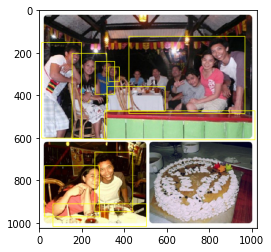

In [6]:
count = 0
nogood = 0

for idx, singleXml in enumerate(xmlls[:1]):
    
    xmlname = os.path.join(datapath,singleXml)
    doc = ET.parse(xmlname)
    root = doc.getroot()
    imagename = root.find('filename').text
    filepath = os.path.join(imagepath,imagename)
    objects = root.iter('object')
    src = cv2.imread(filepath)

    padboxs = []

    objects = root.iter('object')
    #Crop NONVOCclass
    for annotation in objects:
        name = annotation.find('name').text
        print(name)
        bndbox = annotation.find('bndbox')
        
        x_l = int(bndbox.find('xmin').text)
        y_b = int(bndbox.find('ymin').text)
        x_r = int(bndbox.find('xmax').text)
        y_u = int(bndbox.find('ymax').text)
        print(x_l,y_b,x_r,y_u)
        
        cv2.rectangle(src,(x_l,y_b),(x_r,y_u),(0,255,255),2)
    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    plt.imshow(src)